Observations and Insights
- I randomly select latitude and longitude coordinates to have over 500 cities around the world for my dataset. The cities that I randomly got, are cities from different countries and areas.
- The first scatter plot shows us that cities above 0 or higher longitude have lower temperatures and that cities below 0 or lower longitude have higher temperatures.
- The same trend we see between the latitude vs temperature plot, we have it between the latitude vs cloudiness. The higher the latitude above 0 shows a lower percentage or clouds and the lower the latitude below 0 have a higher percentage of clouds.
- The scatter plots we see with a linear regression, show us the direction where the data is moving. For example, the humidity versus the latitude doesn’t show a clear trend but the linear regression helps us to see the direction of the data.

In [55]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
from api_keys import weather_api_key
from citipy import citipy
import datetime as dt

In [56]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

# List to store latitude and longitude and cities
lat_longs = []
cities = []

# Create a set of random latitude and longitude
lat = np.random.uniform(lat_range[0], lat_range[1], size=1300)
long = np.random.uniform(long_range[0], long_range[1], size=1300)
lat_longs = zip(lat, long)

# Identify nearest city for each latitude and longitude
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to the list called "cities"
    if city not in cities:
        cities.append(city)
# Print the number of cities
len(cities)

561

In [57]:
# OpenWather API url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [58]:
# Declare vaiable, assign a start value of 1 and create a list
item = 1
batch = 1
weather_data = []

# Start For-In loop
for city in cities:
    response = requests.get(query_url + city).json()
    print(f"Record {item} of {batch} | {city}")    
    try:
        city_data = {}    
        city_data['City'] = city
        city_data['Country'] = response['sys']['country']
        city_data['Latitude'] = response['coord']['lat']
        city_data['Longitude'] = response['coord']['lon']
        city_data['Temperature (F)'] = response['main']['temp']
        city_data['Humidity (%)'] = response['main']['humidity']
        city_data['Cloudiness (%)'] = response['clouds']['all']
        city_data['Wind Speed (mph)'] = response['wind']['speed']
        city_data['Date'] = dt.datetime.fromtimestamp(response['dt']).strftime('%m-%d-%Y')
        weather_data.append(city_data)
    
        # increase item count by 1
        item += 1
        
        # if statement to limit API calls to X using time.sleep (openweathermap API limits calls to 60/minute)
        if item > 10:
            # start a new set of items
            batch += 1
            
            # reset item count to 1 for next set
            item = 1

            # delay the execution to stay within the limits of the API query ---
            time.sleep(1)
    except:
        print(f"City '{city}' not found, skipping.")
print("Data Complete")

Record 1 of 1 | atuona
Record 2 of 1 | bredasdorp
Record 3 of 1 | taoudenni
Record 4 of 1 | taolanaro
City 'taolanaro' not found, skipping.
Record 4 of 1 | vaini
Record 5 of 1 | hilo
Record 6 of 1 | puerto escondido
Record 7 of 1 | salalah
Record 8 of 1 | illoqqortoormiut
City 'illoqqortoormiut' not found, skipping.
Record 8 of 1 | banyliv
Record 9 of 1 | mys shmidta
City 'mys shmidta' not found, skipping.
Record 9 of 1 | busselton
Record 10 of 1 | hermanus
City 'hermanus' not found, skipping.
Record 1 of 2 | port alfred
Record 2 of 2 | tiksi
Record 3 of 2 | jalu
Record 4 of 2 | kavaratti
Record 5 of 2 | komsomolskiy
Record 6 of 2 | gulu
Record 7 of 2 | vao
Record 8 of 2 | coruripe
Record 9 of 2 | constitucion
Record 10 of 2 | albany
City 'albany' not found, skipping.
Record 1 of 3 | tsihombe
City 'tsihombe' not found, skipping.
Record 1 of 3 | macaubas
Record 2 of 3 | grand river south east
City 'grand river south east' not found, skipping.
Record 2 of 3 | kysyl-syr
Record 3 of 3 | at

Record 2 of 23 | dukat
Record 3 of 23 | sao filipe
Record 4 of 23 | smithers
Record 5 of 23 | dondo
Record 6 of 23 | khatima
Record 7 of 23 | ilhabela
Record 8 of 23 | santa maria del oro
Record 9 of 23 | aswan
Record 10 of 23 | kushiro
City 'kushiro' not found, skipping.
Record 1 of 24 | thompson
Record 2 of 24 | tabiauea
City 'tabiauea' not found, skipping.
Record 2 of 24 | la ronge
Record 3 of 24 | baruun-urt
Record 4 of 24 | esqueda
Record 5 of 24 | solok
Record 6 of 24 | castro
Record 7 of 24 | laguna
Record 8 of 24 | burnie
Record 9 of 24 | victoria
Record 10 of 24 | sfantu gheorghe
City 'sfantu gheorghe' not found, skipping.
Record 1 of 25 | srivardhan
Record 2 of 25 | micco
Record 3 of 25 | tuatapere
Record 4 of 25 | okato
Record 5 of 25 | jumla
Record 6 of 25 | swan hill
Record 7 of 25 | khonsa
Record 8 of 25 | ponta delgada
Record 9 of 25 | eirunepe
Record 10 of 25 | lompoc
City 'lompoc' not found, skipping.
Record 1 of 26 | chabahar
Record 2 of 26 | katsuura
Record 3 of 26 |

Record 6 of 45 | manokwari
Record 7 of 45 | luxor
Record 8 of 45 | ajdabiya
Record 9 of 45 | esmeraldas
Record 10 of 45 | cockburn town
City 'cockburn town' not found, skipping.
Record 1 of 46 | eureka
Record 2 of 46 | salinopolis
Record 3 of 46 | labuhan
Record 4 of 46 | mayor pablo lagerenza
Record 5 of 46 | mto wa mbu
Record 6 of 46 | zlatoustovsk
City 'zlatoustovsk' not found, skipping.
Record 6 of 46 | alibag
Record 7 of 46 | palencia
Record 8 of 46 | arlit
Record 9 of 46 | aukra
Record 10 of 46 | matara
City 'matara' not found, skipping.
Record 1 of 47 | mehamn
Record 2 of 47 | keti bandar
Record 3 of 47 | adrar
Record 4 of 47 | brownsville
Record 5 of 47 | topeka
Record 6 of 47 | inirida
Record 7 of 47 | roma
Record 8 of 47 | taltal
Record 9 of 47 | talara
Record 10 of 47 | coihaique
City 'coihaique' not found, skipping.
Record 1 of 48 | gurskoye
City 'gurskoye' not found, skipping.
Record 1 of 48 | riyadh
Record 2 of 48 | manoel urbano
Record 3 of 48 | general pico
Record 4 of 

In [59]:
# Create a data frame from cities, lat, and temp
weather_df = pd.DataFrame(weather_data)
# Export data to CSV file                            
weather_df.to_csv("output_data/cities.csv", index=True, index_label="City ID", header=True)
# Print data
weather_df

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,atuona,PF,-9.8000,-139.0333,78.78,75,9,20.65,02-01-2022
1,bredasdorp,ZA,-34.5322,20.0403,69.12,88,27,9.22,02-01-2022
2,taoudenni,ML,22.6783,-3.9836,63.54,8,13,11.52,02-01-2022
3,vaini,TO,-21.2000,-175.2000,84.36,79,40,10.36,02-01-2022
4,hilo,US,19.7297,-155.0900,68.83,84,0,4.61,02-01-2022
...,...,...,...,...,...,...,...,...,...
505,chernyshevskiy,RU,63.0128,112.4714,-13.20,91,61,2.21,02-01-2022
506,sorland,NO,67.6670,12.6934,33.60,51,100,16.87,02-01-2022
507,tottenham,AU,-32.2333,147.3500,77.86,65,99,7.67,02-01-2022
508,evensk,RU,61.9500,159.2333,22.71,51,100,26.44,02-01-2022


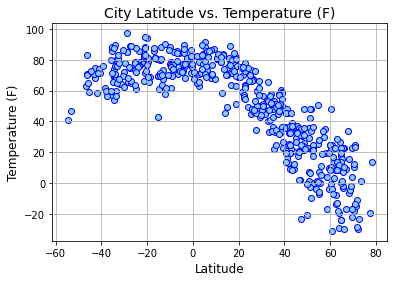

In [73]:
# Temperature (F) vs. Latitude plot
latitudes = weather_df["Latitude"]
temperatures = weather_df["Temperature (F)"]

# Create scatter plot
plt.scatter(latitudes, temperatures, marker="o", facecolors="lightskyblue", edgecolors="blue")

# Assign to the plot, title, x label and y label
plt.title("City Latitude vs. Temperature (F)", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Export and save scatter plot as an image
plt.savefig("Images/latitude-vs-temperature.png")
# Print plot
plt.show()

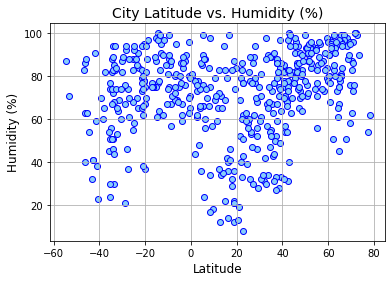

In [74]:
# Humidity (%) vs. Latitude plot
latitudes = weather_df["Latitude"]
humidity = weather_df["Humidity (%)"]

# Create scatter plot
plt.scatter(latitudes, humidity, marker="o", facecolors="lightskyblue", edgecolors="blue")

# Assign to the plot, title, x label and y label
plt.title("City Latitude vs. Humidity (%)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Export and save scatter plot as an image
plt.savefig("Images/latitude-vs-humidity.png")
# Print plot
plt.show()

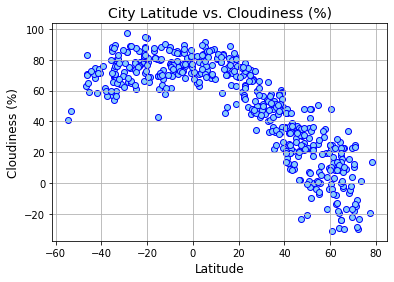

In [75]:
# Cloudiness (%) vs. Latitude plot
latitudes = weather_df["Latitude"]
cloudiness = weather_df["Cloudiness (%)"]

# Create scatter plot
plt.scatter(latitudes, temperatures, marker="o", facecolors="lightskyblue", edgecolors="blue")

# Assign to the plot, title, x label and y label
plt.title("City Latitude vs. Cloudiness (%)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Export and save scatter plot as an image
plt.savefig("Images/latitude-vs-cloudiness.png")
# Print plot
plt.show()

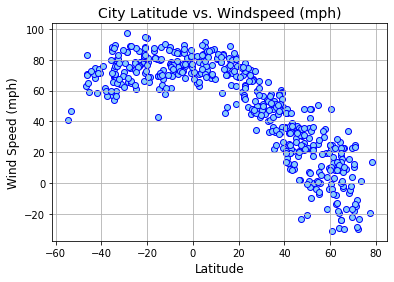

In [63]:
# Wind Speed (mph) vs. Latitude
latitudes = weather_df["Latitude"]
windspeed = weather_df["Wind Speed (mph)"]

# Create scatter plot
plt.scatter(latitudes, temperatures, marker="o", facecolors="lightskyblue", edgecolors="blue")

# Assign to the plot, title, x label and y label
plt.title("City Latitude vs. Windspeed (mph)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Export and save scatter plot as an image
plt.savefig("Images/latitude-vs-windspeed.png")
# Print plot
plt.show()

The r-value is: 0.7850719213775362


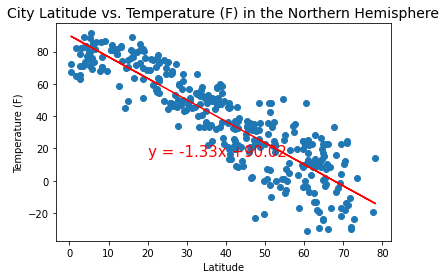

In [76]:
 # Linear regression - Northern Hemisphere - Temperature (F) vs. Latitude

# Get cities with latitude equal or over "0"
northern_lat = weather_df.loc[weather_df["Latitude"] >= 0, :].copy().reset_index(drop=True)

north_lat = northern_lat["Latitude"]
north_temp = northern_lat["Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(north_lat, north_temp)
plt.plot(north_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Temperature (F) in the Northern Hemisphere", fontsize=14)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Export and save scatter plot as an image
plt.savefig("Images/northern-latitude-vs-temperature-lin_reg.png")
plt.show()

The r-value is: 0.11263138993626066


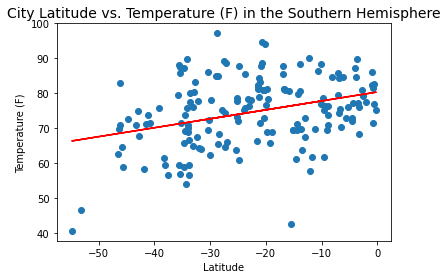

In [77]:
 # Linear regression - Southern Hemisphere - Temperature (F) vs. Latitude

# Get cities with latitude equal or less than "0"
southern_lat = weather_df.loc[weather_df["Latitude"] <= 0, :].copy().reset_index(drop=True)
south_lat = southern_lat["Latitude"]
south_temp = southern_lat["Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(south_lat, south_temp)
plt.plot(south_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Temperature (F) in the Southern Hemisphere", fontsize=14)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Export and save scatter plot as an image
plt.savefig("Images/southern-latitude-vs-temperature-lin_reg.png")
# Print plot
plt.show()

The r-value is: 0.21102440524241226


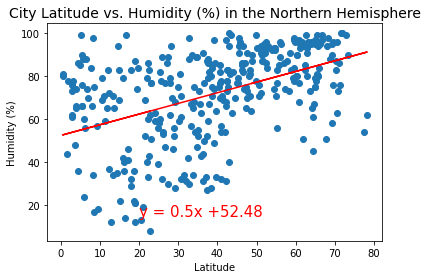

In [78]:
 # Linear regression - Northern Hemisphere - Humidity (%) vs. Latitude

# Get cities with latitude equal or over "0"
northern_lat = weather_df.loc[weather_df["Latitude"] >= 0, :].copy().reset_index(drop=True)
north_lat = northern_lat["Latitude"]
north_hum = northern_lat["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_hum)
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(north_lat, north_hum)
plt.plot(north_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Humidity (%) in the Northern Hemisphere", fontsize=14)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

# Export and save scatter plot as an image
plt.savefig("Images/northern-latitude-vs-humidity-lin_reg.png")
# Print plot
plt.show()

The r-value is: 0.111154376813783


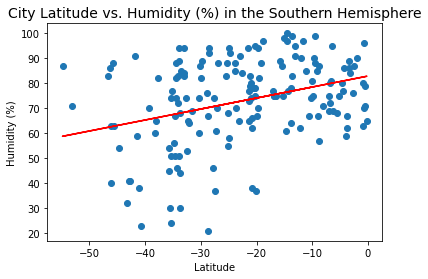

In [79]:
 # Linear regression - Southern Hemisphere - Humidity (%) vs. Latitude

# Get cities with latitude equal or less than "0"
southern_lat = weather_df.loc[weather_df["Latitude"] <= 0, :].copy().reset_index(drop=True)
south_lat = southern_lat["Latitude"]
south_hum = southern_lat["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_hum)
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(south_lat, south_hum)
plt.plot(south_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Humidity (%) in the Southern Hemisphere", fontsize=14)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Export and save scatter plot as an image
plt.savefig("Images/southern-latitude-vs-humidity-lin_reg.png")
# Print plot
plt.show()

The r-value is: 0.0971700141803894


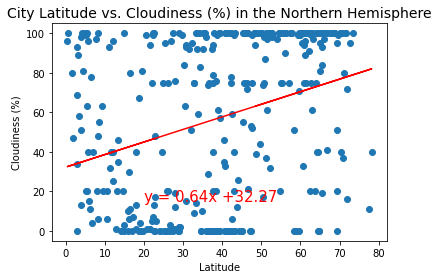

In [80]:
 # Linear regression - Northern Hemisphere - Cloudiness (%) vs. Latitude

# Get cities with latitude equal or over "0"
northern_lat = weather_df.loc[weather_df["Latitude"] >= 0, :].copy().reset_index(drop=True)
north_lat = northern_lat["Latitude"]
north_cloud = northern_lat["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Cloudiness (%) in the Northern Hemisphere", fontsize=14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Export and save scatter plot as an image
plt.savefig("Images/northern-latitude-vs-cloudiness-lin_reg.png")
# Show plot
plt.show()

The r-value is: 0.0971700141803894


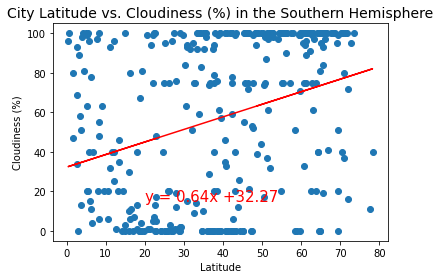

In [81]:
 # Linear regression - Southern Hemisphere - Cloudiness (%) vs. Latitude

# Get cities with latitude equal or less than "0"
southern_lat = weather_df.loc[weather_df["Latitude"] >= 0, :].copy().reset_index(drop=True)
south_lat = northern_lat["Latitude"]
south_cloud = northern_lat["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Cloudiness (%) in the Southern Hemisphere", fontsize=14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Export and save scatter plot as an image
plt.savefig("Images/southern-latitude-vs-cloudiness-lin_reg.png")
# Show plot
plt.show()

The r-value is: 0.01182870623686527


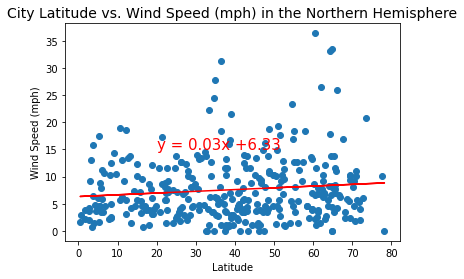

In [70]:
# Linear regression - Northern Hemisphere - Wind Speed (mph) vs. Latitude

# Get cities with latitude equal or over "0"
northern_lat = weather_df.loc[weather_df["Latitude"] >= 0, :].copy().reset_index(drop=True)
north_lat = northern_lat["Latitude"]
north_wind = northern_lat["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Wind Speed (mph) in the Northern Hemisphere", fontsize=14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Export and save scatter plot as an image
plt.savefig("Images/northern-latitude-vs-windspeed-lin_reg.png")
# Show plot
plt.show()

The r-value is: 0.01182870623686527


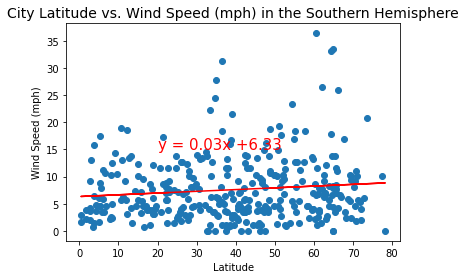

In [71]:
# Linear regression - Southern Hemisphere - Wind Speed (mph) vs. Latitude

# Get cities with latitude equal or less than "0"
southern_lat = weather_df.loc[weather_df["Latitude"] >= 0, :].copy().reset_index(drop=True)
south_lat = northern_lat["Latitude"]
south_wind = northern_lat["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Wind Speed (mph) in the Southern Hemisphere", fontsize=14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Export and save scatter plot as an image
plt.savefig("Images/southern-latitude-vs-windspeed-lin_reg.png")
# Show plot
plt.show()